In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


In [4]:
import os
os.chdir('C:\\Users\\SPURGE\\Desktop\\SCMA')

In [5]:
# Load the dataset
data = pd.read_csv('HR_DataSet.csv')

In [6]:
# Encode categorical variables
categorical_features = ['Department', 'salary']
numeric_features = [col for col in data.columns if col not in categorical_features + ['left']]

In [8]:
# Preprocessing for numerical data
numeric_transformer = SimpleImputer(strategy='median')

In [9]:
# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])


In [10]:
# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [11]:
# Split the data into training and testing sets
X = data.drop('left', axis=1)
y = data['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


In [12]:
# Logistic Regression
logit = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(max_iter=1000))])

In [13]:
logit.fit(X_train, y_train)
logit_pred = logit.predict(X_test)
logit_pred_proba = logit.predict_proba(X_test)[:, 1]

In [14]:
# Confusion Matrix
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, logit_pred))

Logistic Regression Confusion Matrix:
[[2136  155]
 [ 478  231]]


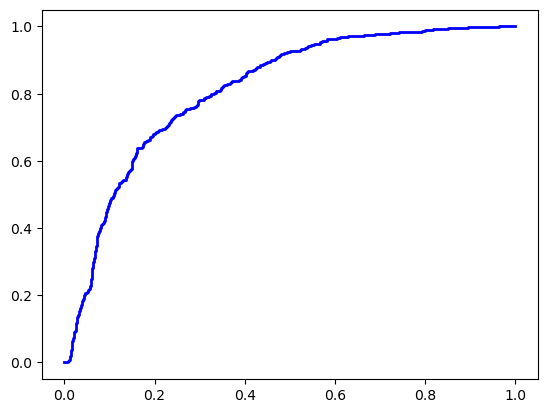

In [15]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, logit_pred_proba)
roc_auc = roc_auc_score(y_test, logit_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='Logistic Regression (area = %0.2f)' % roc_auc)

In [16]:
# Decision Tree
tree = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classifier', DecisionTreeClassifier(random_state=123))])

In [17]:
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)
tree_pred_proba = tree.predict_proba(X_test)[:, 1]

In [18]:
# Confusion Matrix
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, tree_pred))


Decision Tree Confusion Matrix:
[[2257   34]
 [  15  694]]


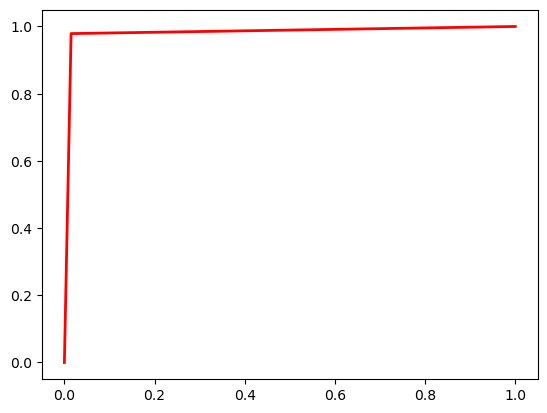

In [19]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, tree_pred_proba)
roc_auc = roc_auc_score(y_test, tree_pred_proba)
plt.plot(fpr, tpr, color='red', lw=2, label='Decision Tree (area = %0.2f)' % roc_auc)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


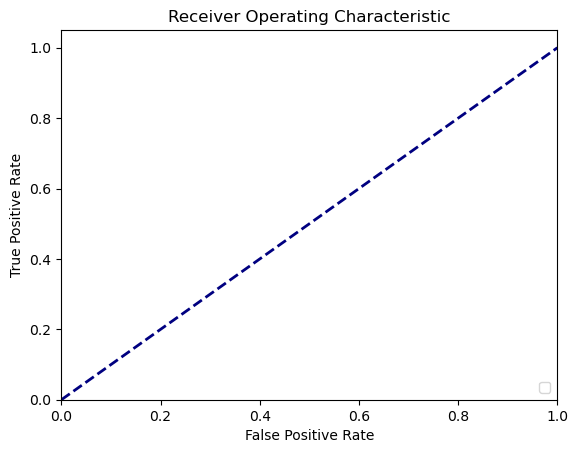

In [20]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()